In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import requests
from plotnine import *
import regex as re


In [55]:
# read raw data from csv file
raw_data = pd.read_csv('./datasets/suicide homicide gdp.csv', sep=',')

# display the raw DataFrame
display(raw_data)

,country,iso3c,iso2c,year,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)",adminregion,incomeLevel
0,Afghanistan,AFG,AF,1970,NaN,NaN,1.748887e+09,NaN,South Asia,Low income
1,Afghanistan,AFG,AF,1971,NaN,NaN,1.831109e+09,NaN,South Asia,Low income
2,Afghanistan,AFG,AF,1972,NaN,NaN,1.595555e+09,NaN,South Asia,Low income
3,Afghanistan,AFG,AF,1973,NaN,NaN,1.733333e+09,NaN,South Asia,Low income
4,Afghanistan,AFG,AF,1974,NaN,NaN,2.155555e+09,NaN,South Asia,Low income
...,...,...,...,...,...,...,...,...,...,...
13561,Zimbabwe,ZWE,ZW,2016,NaN,16.8,2.054868e+10,2806.469032,Sub-Saharan Africa (excluding high income),Lower middle income
13562,Zimbabwe,ZWE,ZW,2017,NaN,15.0,1.758489e+10,3795.642431,Sub-Saharan Africa (excluding high income),Lower middle income
13563,Zimbabwe,ZWE,ZW,2018,NaN,14.0,1.811554e+10,4017.221716,Sub-Saharan Africa (excluding high income),Lower middle income
13564,Zimbabwe,ZWE,ZW,2019,NaN,14.1,1.928429e+10,3783.547898,Sub-Saharan Africa (excluding high income),Lower middle income


In [56]:
# define variable names for the data columns
homicides = 'Intentional homicides (per 100,000 people)'
suicides = 'Suicide mortality rate (per 100,000 population)'
gdp = 'GDP (current US$)'
gdp_pc = 'GDP per capita, PPP (current international $)'

# define labels for visualization purposes
suicide_label = 'Suicide Rate Per 100,000 People'
gdp_pc_label = 'GDP Per Capita (PPP)'

# drop rows with missing values in the 'suicides' and 'incomeLevel' columns
data = raw_data.dropna(subset=[suicides, 'incomeLevel'])

# remove rows that don't meet certain conditions: 
# - year must be greater than or equal to 2000
# - incomeLevel must not be 'Aggregates' or 'Not classified'
data = data.drop(data[(data['year'] < 2000) | (data['incomeLevel'] == 'Aggregates') | (
    data['incomeLevel'] == 'Not classified')].index)

# drop unnecessary columns
data = data.drop(columns=[homicides, 'iso3c', 'iso2c'])

# rename columns for consistency and clarity
data = data.rename(
    columns={f'{gdp}': 'gdp', f'{gdp_pc}': 'gdp_pc', f'{suicides}': 'suicides'})

# remove rows where the country is 'World'
data = data[data['country'] != 'World']

# reset the index of the DataFrame after removing rows
data = data.reset_index(drop=True)

# display the resulting DataFrame
display(data)


,country,year,suicides,gdp,gdp_pc,adminregion,incomeLevel
0,Afghanistan,2000,4.9,NaN,NaN,South Asia,Low income
1,Afghanistan,2001,5.0,NaN,NaN,South Asia,Low income
2,Afghanistan,2002,5.0,4.055180e+09,877.014268,South Asia,Low income
3,Afghanistan,2003,5.0,4.515559e+09,927.857548,South Asia,Low income
4,Afghanistan,2004,5.0,5.226779e+09,925.441429,South Asia,Low income
...,...,...,...,...,...,...,...
3635,Zimbabwe,2015,18.0,1.996312e+10,2679.507615,Sub-Saharan Africa (excluding high income),Lower middle income
3636,Zimbabwe,2016,16.8,2.054868e+10,2806.469032,Sub-Saharan Africa (excluding high income),Lower middle income
3637,Zimbabwe,2017,15.0,1.758489e+10,3795.642431,Sub-Saharan Africa (excluding high income),Lower middle income
3638,Zimbabwe,2018,14.0,1.811554e+10,4017.221716,Sub-Saharan Africa (excluding high income),Lower middle income


In [57]:
# calculate the mean values of 'suicides', 'gdp', and 'gdp_pc' across countries and income levels
means_across_country = data.groupby(['country', 'incomeLevel'])[['suicides', 'gdp', 'gdp_pc']].mean().reset_index()

# calculate the mean values of 'suicides', 'gdp', and 'gdp_pc' across years and income levels
means_across_time = data.groupby(['year', 'incomeLevel'])[['suicides', 'gdp', 'gdp_pc']].mean().reset_index()

# display the resulting DataFrame that shows means across countries and income levels
display(means_across_country)

# display the resulting DataFrame that shows means across years and income levels
display(means_across_time)

,country,incomeLevel,suicides,gdp,gdp_pc
0,Afghanistan,Low income,4.460,1.368449e+10,1590.205477
1,Albania,Upper middle income,5.875,1.035320e+10,8810.190584
2,Algeria,Lower middle income,3.330,1.409770e+11,11661.982095
3,Angola,Lower middle income,7.310,7.622280e+10,6011.694445
4,Antigua and Barbuda,High income,0.655,1.188067e+09,20205.652180
...,...,...,...,...,...
177,Vanuatu,Lower middle income,18.750,5.983245e+08,2645.018747
178,Vietnam,Lower middle income,6.940,1.242308e+11,4492.639897
179,"Yemen, Rep.",Low income,5.815,2.474981e+10,3525.223533
180,Zambia,Lower middle income,10.200,1.667534e+10,2822.771255


,year,incomeLevel,suicides,gdp,gdp_pc
0,2000,High income,13.941176,5.308934e+11,28417.190469
1,2000,Low income,8.348148,7.361866e+09,1102.303458
2,2000,Lower middle income,10.557407,2.835959e+10,2942.269817
3,2000,Upper middle income,12.100000,8.619339e+10,7163.240052
4,2001,High income,13.731373,5.260995e+11,29223.902058
...,...,...,...,...,...
75,2018,Upper middle income,9.350000,4.725870e+11,17202.977805
76,2019,High income,11.168627,1.055134e+12,48738.547358
77,2019,Low income,6.488889,1.742048e+10,1924.373552
78,2019,Lower middle income,9.687037,1.429378e+11,6552.216990


c:\Users\jange\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


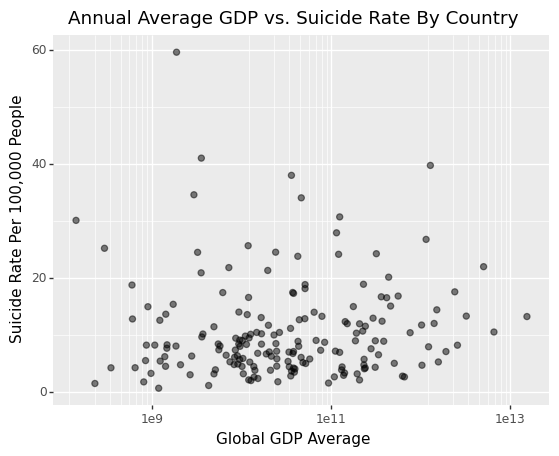

c:\Users\jange\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 3 rows containing missing values.


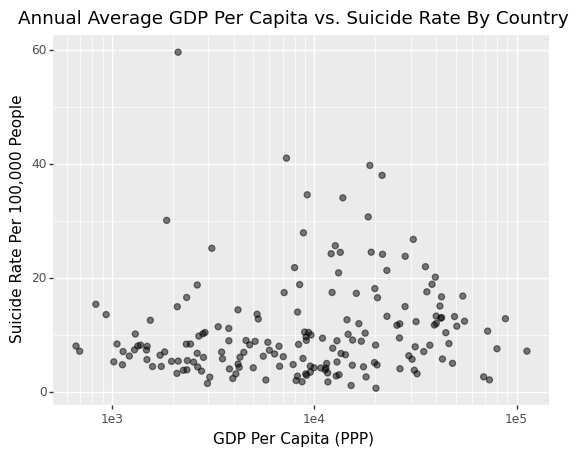

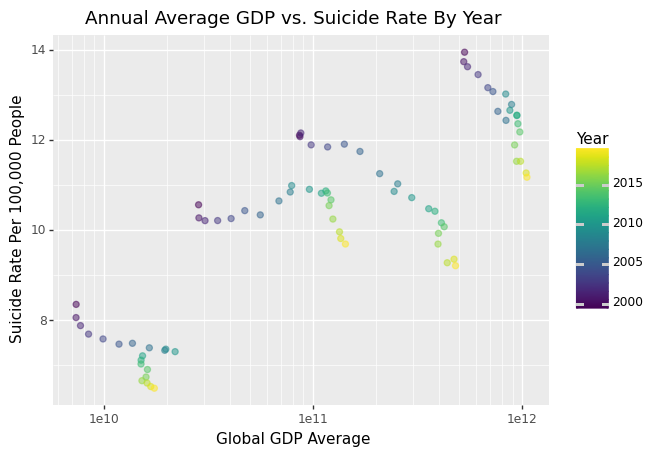

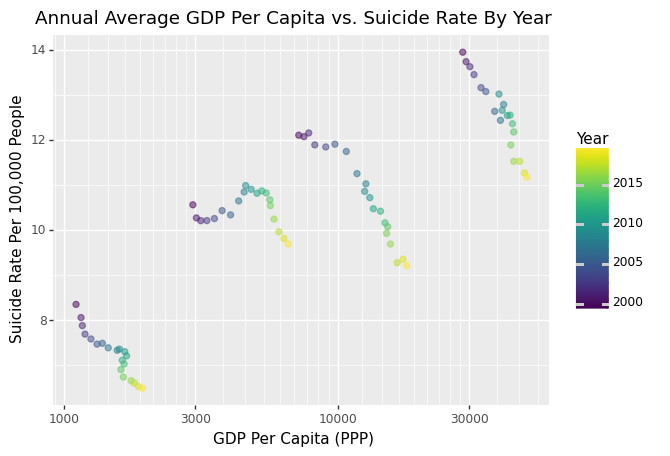

In [58]:
# plot 1: Annual Average GDP vs. Suicide Rate By Country
splot = ggplot(means_across_country, aes(x='gdp', y='suicides')) +\
    geom_point(size=2, alpha=0.5) +\
    labs(title='Annual Average GDP vs. Suicide Rate By Country',
         x='Global GDP Average',
         y=suicide_label) + scale_x_log10()

print(splot)

# plot 2: Annual Average GDP Per Capita vs. Suicide Rate By Country
splot = ggplot(means_across_country, aes(x='gdp_pc', y='suicides')) +\
    geom_point(size=2, alpha=0.5) +\
    labs(title='Annual Average GDP Per Capita vs. Suicide Rate By Country',
         x=gdp_pc_label,
         y=suicide_label) + scale_x_log10()

print(splot)

# plot 3: Annual Average GDP vs. Suicide Rate By Year
splot = ggplot(means_across_time, aes(x='gdp', y='suicides', color='year')) +\
    geom_point(size=2, alpha=0.5) +\
    labs(title='Annual Average GDP vs. Suicide Rate By Year',
         x='Global GDP Average',
         y=suicide_label,
         color='Year') + scale_x_log10()

print(splot)

# plot 4: Annual Average GDP Per Capita vs. Suicide Rate By Year
splot = ggplot(means_across_time, aes(x='gdp_pc', y='suicides', color='year')) +\
    geom_point(size=2, alpha=0.5) +\
    labs(title='Annual Average GDP Per Capita vs. Suicide Rate By Year',
         x=gdp_pc_label,
         y=suicide_label,
         color='Year') + scale_x_log10()

print(splot)

In [59]:
# fit linear regression model for gdp per capita vs. suicide rate
regression_model = smf.ols(formula=f'gdp_pc ~ suicides', data=data).fit()

display(regression_model.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 gdp_pc   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.548
Date:                Fri, 12 May 2023   Prob (F-statistic):             0.0330
Time:                        18:07:45   Log-Likelihood:                -39757.
No. Observations:                3525   AIC:                         7.952e+04
Df Residuals:                    3523   BIC:                         7.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.555e+04    499.636     31.128      0.000    1.46e+04    1.65e+04
suicides      75.6352     35.465      2.133      0.033       6.102     145.168
==============================================================================
Omnibus:                     1707.005   Durbin-Watson:                   0.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9985.326
Skew:                           2.286   Prob(JB):                         0.00
Kurtosis:                       9.862   Cond. No.                         21.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

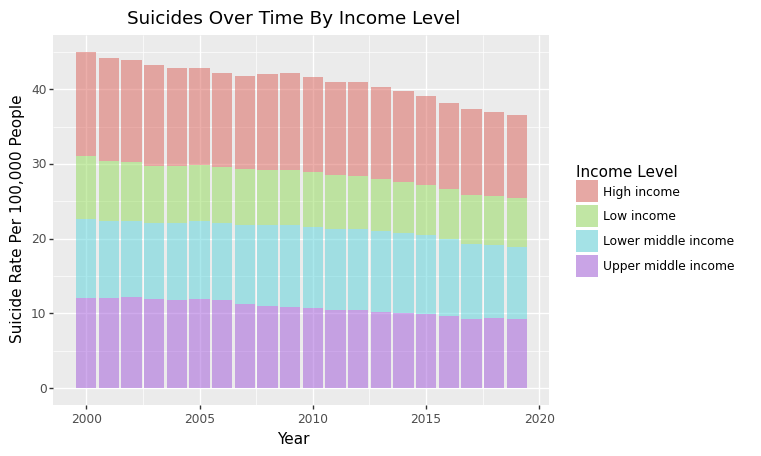

In [60]:
# par Plot: Suicides Over Time By Income Level
bplot = ggplot(means_across_time, aes(x='year', y='suicides', fill='incomeLevel')) +\
    geom_col(size=0.5, alpha=0.5) +\
    labs(title='Suicides Over Time By Income Level',
         x='Year',
         y=suicide_label,
         fill='Income Level')
print(bplot)

c:\Users\jange\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 115 rows containing missing values.


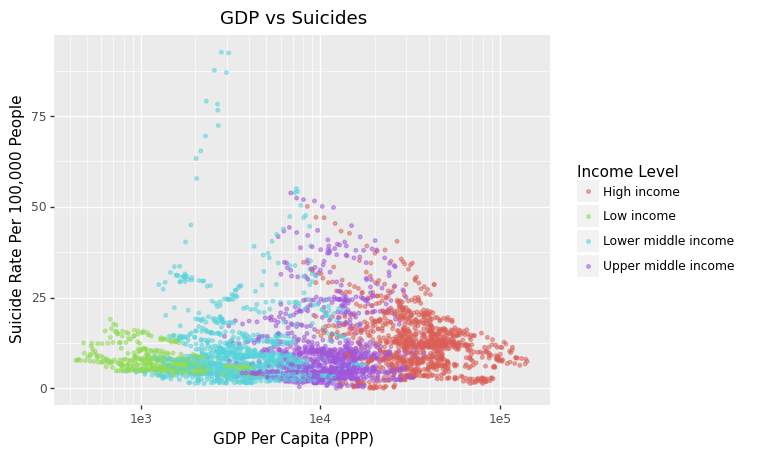

In [61]:
# pcatter Plot: GDP vs Suicides
splot = ggplot(data, aes(x='gdp_pc', y='suicides', color='incomeLevel')) +\
    geom_point(size=1, alpha=0.5) +\
    labs(title='GDP vs Suicides',
         x=gdp_pc_label,
         y=suicide_label,
         color='Income Level') +\
    scale_x_log10()

print(splot)

In [62]:
# read raw data from csv file
raw_data = pd.read_csv('./datasets/sex_race_gender_suicide_data_us.csv')

# display the raw DataFrame
display(raw_data)

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1950,1,All ages,0.0,13.2,NaN
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1960,2,All ages,0.0,12.5,NaN
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1970,3,All ages,0.0,13.1,NaN
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1980,4,All ages,0.0,12.2,NaN
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1981,5,All ages,0.0,12.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6385,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Not Hispanic or Latino: Black or Afric...,7.225,2018,42,65 years and over,5.0,1.3,NaN
6386,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 15-24 y...,7.232,2018,42,15-24 years,2.0,4.1,NaN
6387,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 25-44 y...,7.233,2018,42,25-44 years,3.0,4.4,NaN
6388,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 45-64 y...,7.234,2018,42,45-64 years,4.0,3.2,NaN


In [63]:
# drop rows with missing values in the 'ESTIMATE' column
data = raw_data.dropna(subset=['ESTIMATE'])

# remove rows that meet specific conditions: 
# - UNIT_NUM must be 1
# - YEAR must be less than 2000
data = data.drop(data[(data['UNIT_NUM'] == 1) | (data['YEAR'] < 2000)].index)

# drop unnecessary columns: 'UNIT', 'INDICATOR', 'UNIT_NUM', 'AGE_NUM', 'YEAR_NUM', 'FLAG'
data = data.drop(columns=['UNIT', 'INDICATOR', 'UNIT_NUM', 'AGE_NUM', 'YEAR_NUM', 'FLAG'], axis=1)

# reset the index of the DataFrame after removing rows
data = data.reset_index(drop=True)

# display the resulting DataFrame
display(data)

,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,AGE,ESTIMATE
0,Total,0,All persons,0.000,2000,All ages,10.4
1,Total,0,All persons,0.000,2001,All ages,10.7
2,Total,0,All persons,0.000,2002,All ages,11.0
3,Total,0,All persons,0.000,2003,All ages,10.9
4,Total,0,All persons,0.000,2004,All ages,11.1
...,...,...,...,...,...,...,...
2628,"Sex, age and race and Hispanic origin (Single ...",11,Female: Not Hispanic or Latino: Black or Afric...,7.225,2018,65 years and over,1.3
2629,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 15-24 y...,7.232,2018,15-24 years,4.1
2630,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 25-44 y...,7.233,2018,25-44 years,4.4
2631,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 45-64 y...,7.234,2018,45-64 years,3.2


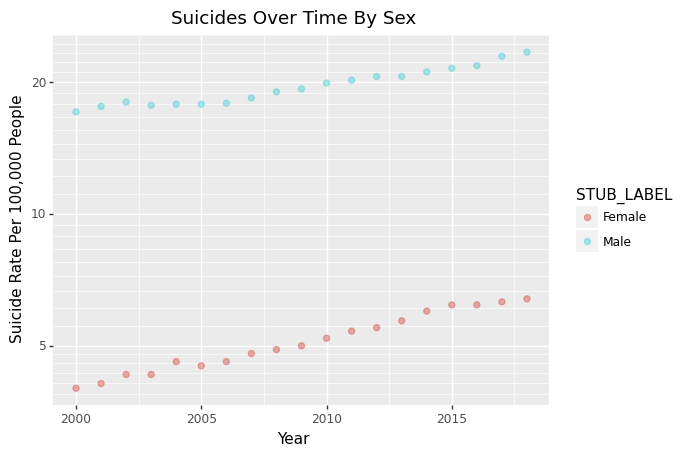

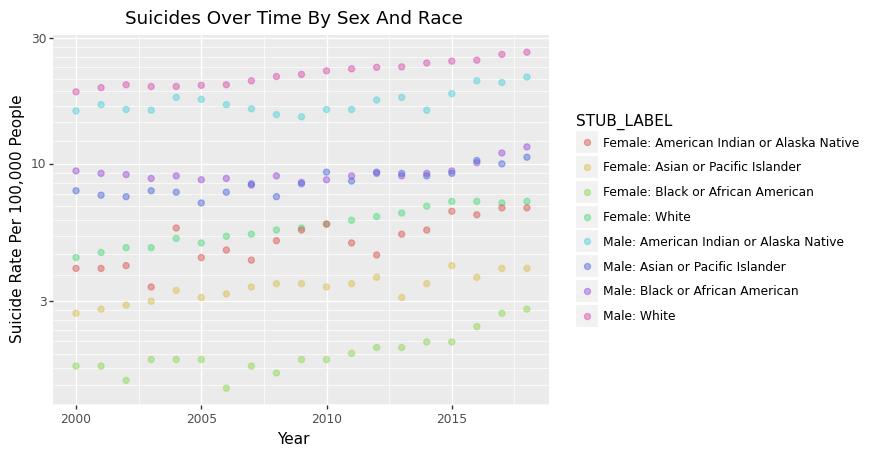

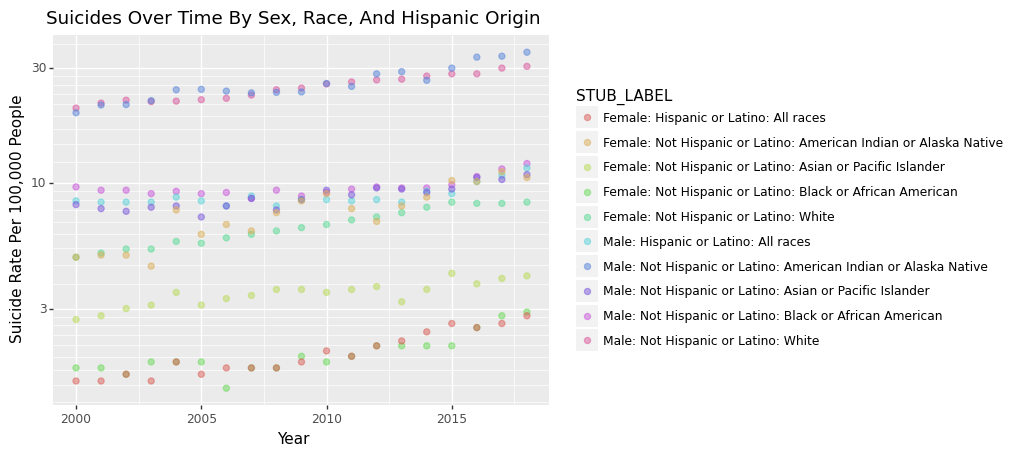

In [64]:
# pcatter Plot 1: Suicides Over Time By Sex
splot = ggplot(data[(data['STUB_NAME_NUM'] == 2)], aes(x='YEAR', y='ESTIMATE', color='STUB_LABEL')) +\
    geom_point(size=2, alpha=0.5) +\
    labs(title='Suicides Over Time By Sex',
         x='Year',
         y=suicide_label) + scale_y_log10()

print(splot)

# pcatter Plot 2: Suicides Over Time By Sex And Race
splot = ggplot(data[(data['STUB_NAME_NUM'] == 4)], aes(x='YEAR', y='ESTIMATE', color='STUB_LABEL')) +\
    geom_point(size=2, alpha=0.5) +\
    labs(title='Suicides Over Time By Sex And Race',
         x='Year',
         y=suicide_label) + scale_y_log10()

print(splot)

# bcatter Plot 3: Suicides Over Time By Sex, Race, And Hispanic Origin
splot = ggplot(data[(data['STUB_NAME_NUM'] == 6)], aes(x='YEAR', y='ESTIMATE', color='STUB_LABEL')) +\
    geom_point(size=2, alpha=0.5) +\
    labs(title='Suicides Over Time By Sex, Race, And Hispanic Origin',
         x='Year',
         y=suicide_label) + scale_y_log10()

print(splot)

C:\Users\jange\AppData\Local\Temp\ipykernel_4620\944064277.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.


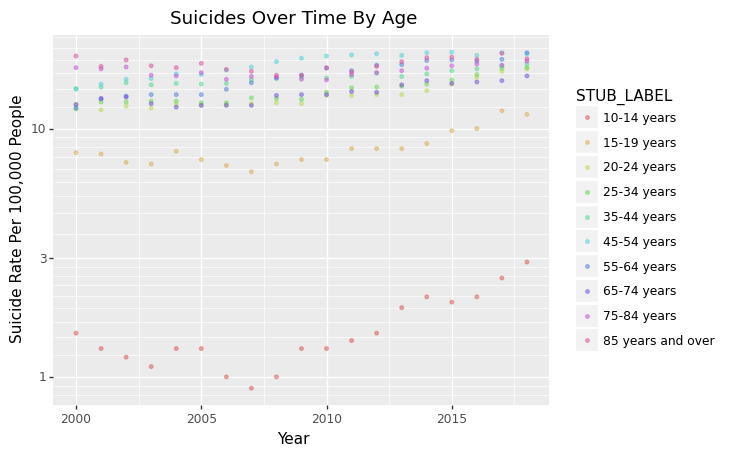

In [65]:
# regex pattern to match specific age categories
age_cat = r'(1[.]\d\d)|(1[.]1)'

# pcatter Plot: Suicides Over Time By Age
splot = ggplot(data[data['STUB_LABEL_NUM'].astype(str).str.contains(age_cat)], aes(x='YEAR', y='ESTIMATE', color='STUB_LABEL')) +\
    geom_point(size=1, alpha=0.5) +\
    labs(title='Suicides Over Time By Age',
         x='Year',
         y=suicide_label) + scale_y_log10()

print(splot)

Wadood

In [66]:
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api
from plotnine import *
from statsmodels.graphics.factorplots import interaction_plot
from sklearn.linear_model import LinearRegression

In [67]:
# petrieve GDP data for states from a URL using requests
gdp_states = requests.get('https://raw.githubusercontent.com/wadoodbutt/wadoodbutt.github.io/main/datasets/statesgdp.csv')

# pead the data into a Pandas DataFrame
file_gdp_states = io.StringIO(gdp_states.text)
df_gdp_states = pd.read_csv(file_gdp_states, sep=',')

# bet the column names to the values in the 4th row
df_gdp_states.columns = df_gdp_states.iloc[3]

# srop the first 4 rows (0, 1, 2, 3) as they contain unnecessary information
df_gdp_states = df_gdp_states.drop([0, 1, 2, 3])

# seset the index of the DataFrame after dropping rows
df_gdp_states = df_gdp_states.reset_index(drop=True)

# srop columns from index 4 to 44 (exclusive) using iloc
df_gdp_states = df_gdp_states.drop(df_gdp_states.iloc[:, 4:44], axis=1)

# srint the row at index 251 (presumably a specific state's GDP data)
print(df_gdp_states.iloc[251])

# sisplay the first few rows of the DataFrame
df_gdp_states.head()


3
Country Name          United States
Country Code                    USA
Indicator Name    GDP (current US$)
Indicator Code       NY.GDP.MKTP.CD
2000.0             10250900000000.0
2001.0             10581900000000.0
2002.0             10929100000000.0
2003.0             11456400000000.0
2004.0             12217200000000.0
2005.0             13039200000000.0
2006.0             13815600000000.0
2007.0             14474200000000.0
2008.0             14769900000000.0
2009.0             14478100000000.0
2010.0             15049000000000.0
2011.0             15599700000000.0
2012.0             16254000000000.0
2013.0             16843200000000.0
2014.0             17550700000000.0
2015.0             18206000000000.0
2016.0             18695100000000.0
2017.0             19477300000000.0
2018.0             20533100000000.0
2019.0             21381000000000.0
2020.0             21060500000000.0
2021.0             23315100000000.0
Name: 251, dtype: object


3,Country Name,Country Code,Indicator Name,Indicator Code,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1.873184e+09,1.896648e+09,1.962011e+09,2.044134e+09,2.254749e+09,2.359777e+09,...,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.368970e+09,2.610039e+09,3.126019e+09
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.839380e+11,2.588300e+11,2.648810e+11,3.526740e+11,4.388530e+11,5.122340e+11,...,9.720020e+11,9.826770e+11,1.003400e+12,9.231440e+11,8.898590e+11,1.030480e+12,1.016700e+12,1.009050e+12,9.341790e+11,1.089450e+12
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,3.854235e+09,4.539501e+09,5.220824e+09,6.226199e+09,...,2.020357e+10,2.056449e+10,2.055058e+10,1.999816e+10,1.801956e+10,1.889635e+10,1.841885e+10,1.890449e+10,2.014344e+10,1.478686e+10
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.404100e+11,1.467800e+11,1.766060e+11,2.044710e+11,2.534720e+11,3.100940e+11,...,7.360400e+11,8.322170e+11,8.924980e+11,7.669580e+11,6.905450e+11,6.837480e+11,7.663600e+11,7.947190e+11,7.848000e+11,8.401870e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,9.129595e+09,8.936064e+09,1.528559e+10,1.781270e+10,2.355205e+10,3.697092e+10,...,1.249980e+11,1.334020e+11,1.372440e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.361907e+10,6.740429e+10


In [68]:
# petrieve suicide data for states from a URL using requests
sui_states = requests.get('https://raw.githubusercontent.com/wadoodbutt/wadoodbutt.github.io/main/datasets/statessuicide.csv')

# pead the data into a Pandas DataFrame
file_sui_states = io.StringIO(sui_states.text)
df_sui_states = pd.read_csv(file_sui_states, sep=',')

# bet the column names to the values in the 4th row
df_sui_states.columns = df_sui_states.iloc[3]

# srop the first 4 rows (0, 1, 2, 3) as they contain unnecessary information
df_sui_states = df_sui_states.drop([0, 1, 2, 3])

# seset the index of the DataFrame after dropping rows
df_sui_states = df_sui_states.reset_index(drop=True)

# srop columns from index 4 to 44 (exclusive) using iloc
df_sui_states = df_sui_states.drop(df_sui_states.iloc[:, 4:44], axis=1)

# srint the row at index 251 (presumably a specific state's suicide data)
print(df_sui_states.iloc[251])


3
Country Name                                        United States
Country Code                                                  USA
Indicator Name    Suicide mortality rate (per 100,000 population)
Indicator Code                                     SH.STA.SUIC.P5
2000.0                                                       11.0
2001.0                                                       11.4
2002.0                                                       11.8
2003.0                                                       11.7
2004.0                                                       11.9
2005.0                                                       11.9
2006.0                                                       12.1
2007.0                                                       12.4
2008.0                                                       12.7
2009.0                                                       12.8
2010.0                                                       13.1
2011.0  

In [69]:
# preate an empty DataFrame to store the final data
df_final = pd.DataFrame()

# pxtract the suicide data for a specific state from the suicide DataFrame and transpose it
df_final['suicide'] = df_sui_states.iloc[251, 4:26].transpose()

# bxtract the GDP data for the same specific state from the GDP DataFrame and transpose it
df_final['gdp'] = df_gdp_states.iloc[251, 4:26].transpose()

# sreate a scatter plot with GDP on the x-axis and suicide rate on the y-axis
plt.scatter(x=df_final['gdp'], y=df_final['suicide'])

# set the x-axis label
plt.xlabel("GDP")

# set the y-axis label
plt.ylabel("Suicide / 100,000 People")

# srint the final DataFrame
print(df_final)

       suicide               gdp
3                               
2000.0    11.0  10250900000000.0
2001.0    11.4  10581900000000.0
2002.0    11.8  10929100000000.0
2003.0    11.7  11456400000000.0
2004.0    11.9  12217200000000.0
2005.0    11.9  13039200000000.0
2006.0    12.1  13815600000000.0
2007.0    12.4  14474200000000.0
2008.0    12.7  14769900000000.0
2009.0    12.8  14478100000000.0
2010.0    13.1  15049000000000.0
2011.0    13.4  15599700000000.0
2012.0    13.5  16254000000000.0
2013.0    13.5  16843200000000.0
2014.0    14.0  17550700000000.0
2015.0    14.4  18206000000000.0
2016.0    15.1  18695100000000.0
2017.0    15.9  19477300000000.0
2018.0    15.7  20533100000000.0
2019.0    16.1  21381000000000.0
2020.0     NaN  21060500000000.0
2021.0     NaN  23315100000000.0


In [70]:
# petrieve Gini coefficient data from a URL using requests
gini_data = requests.get('https://raw.githubusercontent.com/wadoodbutt/wadoodbutt.github.io/main/datasets/gini_global_data.csv')

# pead the data into a Pandas DataFrame
file_gini = io.StringIO(gini_data.text)
df_gini = pd.read_csv(file_gini, sep=',')

# bet the column names to the values in the 4th row
df_gini.columns = df_gini.iloc[3]

# srop the first 4 rows (0, 1, 2, 3) as they contain unnecessary information
df_gini = df_gini.drop([0, 1, 2, 3])

# seset the index of the DataFrame after dropping rows
df_gini = df_gini.reset_index(drop=True)

# srop columns from index 4 to 44 (exclusive) using iloc
df_gini = df_gini.drop(df_gini.iloc[:, 4:44], axis=1)

# srint the row at index 251 (presumably a specific country's Gini coefficient data)
print(df_gini.iloc[251])

3
Country Name      United States
Country Code                USA
Indicator Name       Gini index
Indicator Code      SI.POV.GINI
2000.0                     40.1
2001.0                     40.6
2002.0                     40.4
2003.0                     40.8
2004.0                     40.3
2005.0                     41.0
2006.0                     41.4
2007.0                     40.8
2008.0                     40.8
2009.0                     40.6
2010.0                     40.0
2011.0                     40.9
2012.0                     40.9
2013.0                     40.7
2014.0                     41.5
2015.0                     41.2
2016.0                     41.1
2017.0                     41.2
2018.0                     41.4
2019.0                     41.5
2020.0                     39.7
2021.0                      NaN
Name: 251, dtype: object


In [71]:
# create an empty DataFrame to store the final data
df_final_g = pd.DataFrame()

# extract the suicide data for a specific state from the suicide DataFrame and transpose it
df_final_g['suicide'] = df_sui_states.iloc[251, 4:26].transpose()

# extract the Gini coefficient data for the same specific state from the Gini DataFrame and transpose it
df_final_g['gini'] = df_gini.iloc[251, 4:26].transpose()

# create a scatter plot with Gini coefficient on the x-axis and suicide rate on the y-axis
plt.scatter(x=df_final_g['gini'], y=df_final_g['suicide'])

# set the x-axis label
plt.xlabel("Gini Index")

# set the y-axis label
plt.ylabel("Suicide / 100,000 People")

# print the final DataFrame
print(df_final_g)

       suicide  gini
3                   
2000.0    11.0  40.1
2001.0    11.4  40.6
2002.0    11.8  40.4
2003.0    11.7  40.8
2004.0    11.9  40.3
2005.0    11.9  41.0
2006.0    12.1  41.4
2007.0    12.4  40.8
2008.0    12.7  40.8
2009.0    12.8  40.6
2010.0    13.1  40.0
2011.0    13.4  40.9
2012.0    13.5  40.9
2013.0    13.5  40.7
2014.0    14.0  41.5
2015.0    14.4  41.2
2016.0    15.1  41.1
2017.0    15.9  41.2
2018.0    15.7  41.4
2019.0    16.1  41.5
2020.0     NaN  39.7
2021.0     NaN   NaN
